In [1]:
# imports
%cd ..
import os
from tqdm.notebook import tqdm
from mango.environments import frozen_lake
from mango import Agent, Mango
from frozen_lake_tests import utils_plot, utils_save, utils_sim

/home/davide_sartor/MANGO-lite


Experiment Parameters

In [4]:
# parameters for the environment
map_base = 2
map_scale = 3
p_frozen = [0.8, 0.5, 0.3]
one_shot = False

plot_vanilla_agent = True
plot_nomask_mango_agent = True

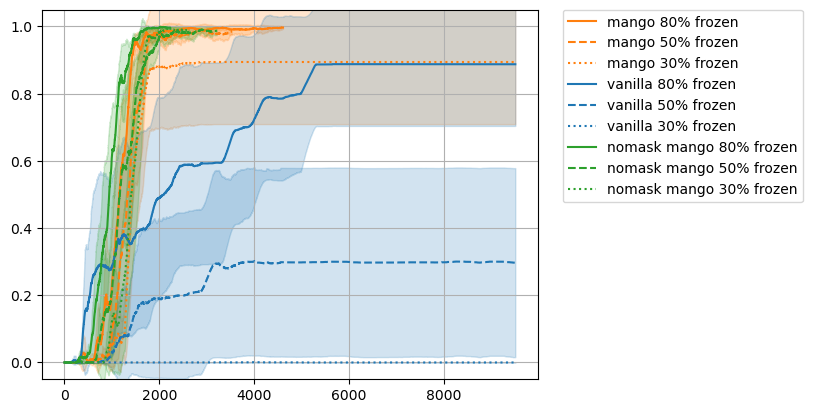

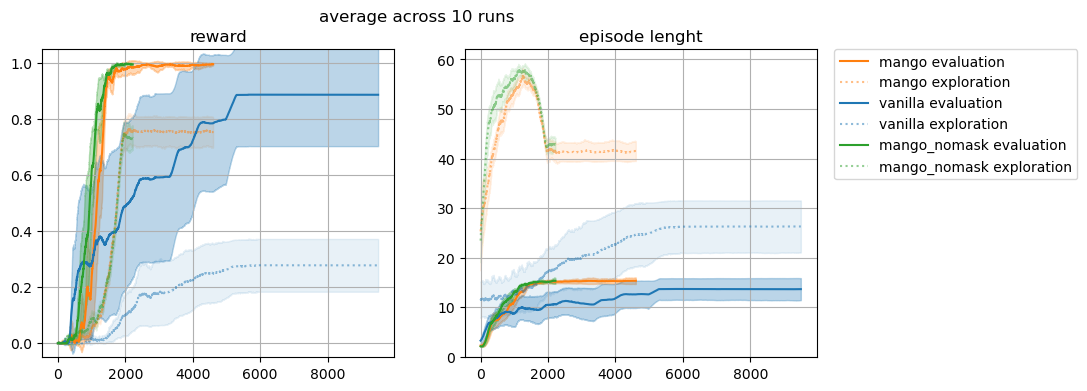

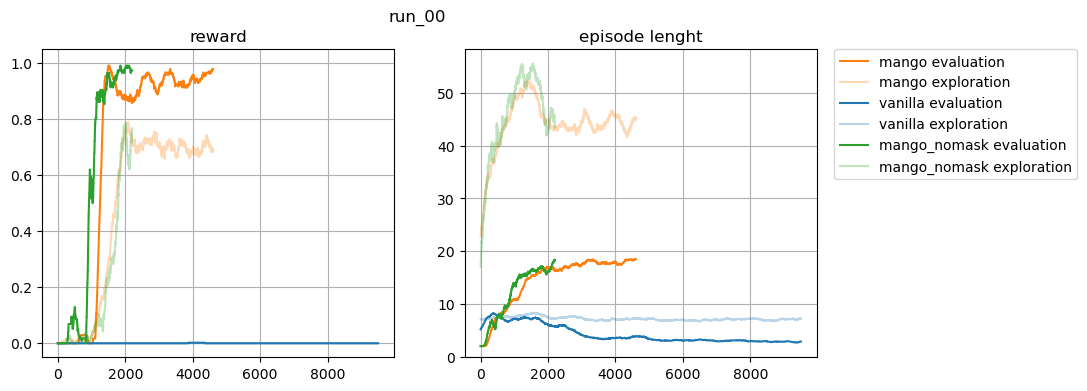

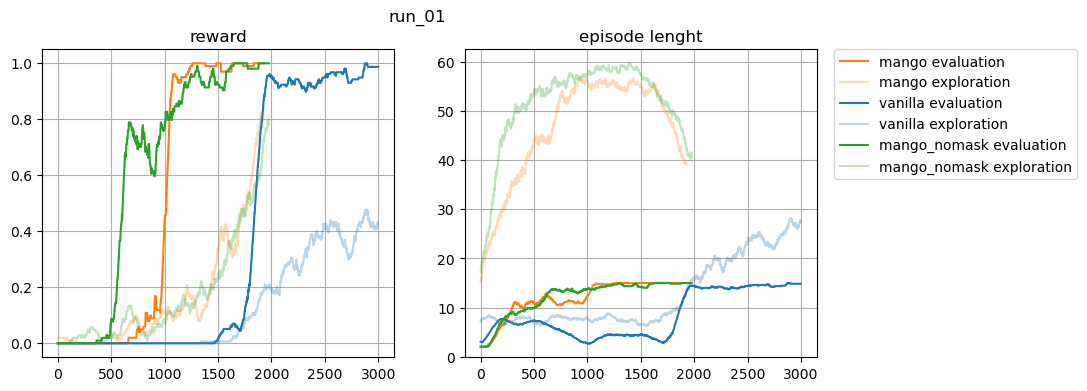

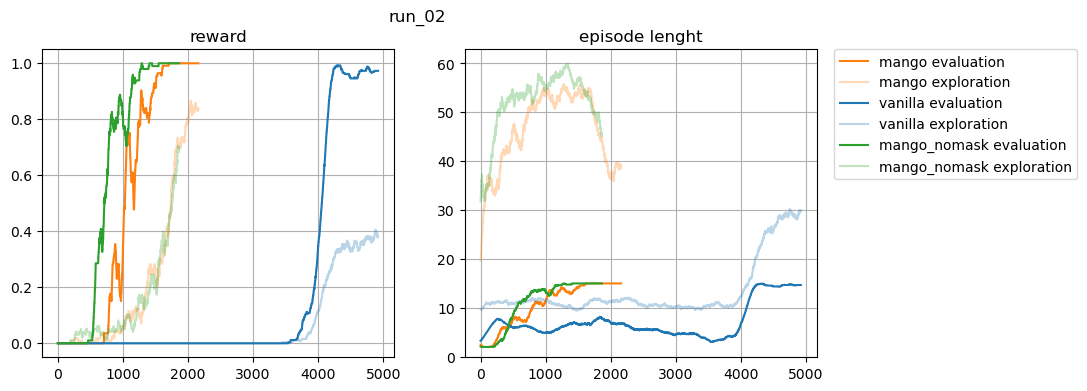

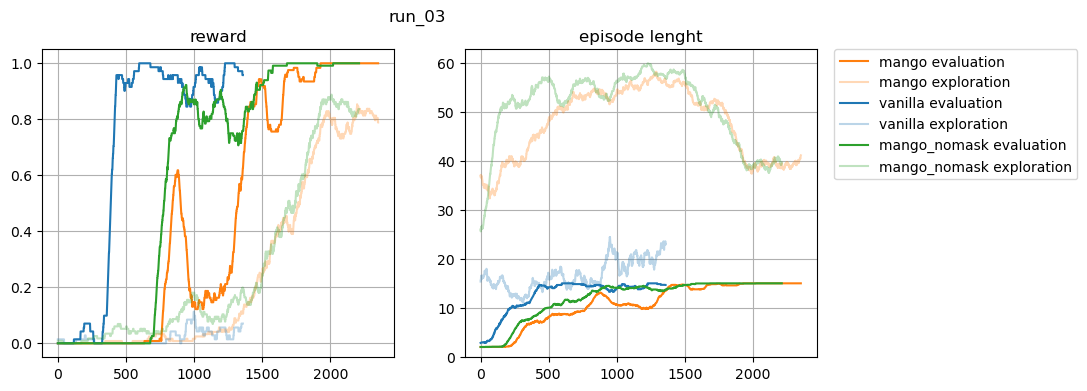

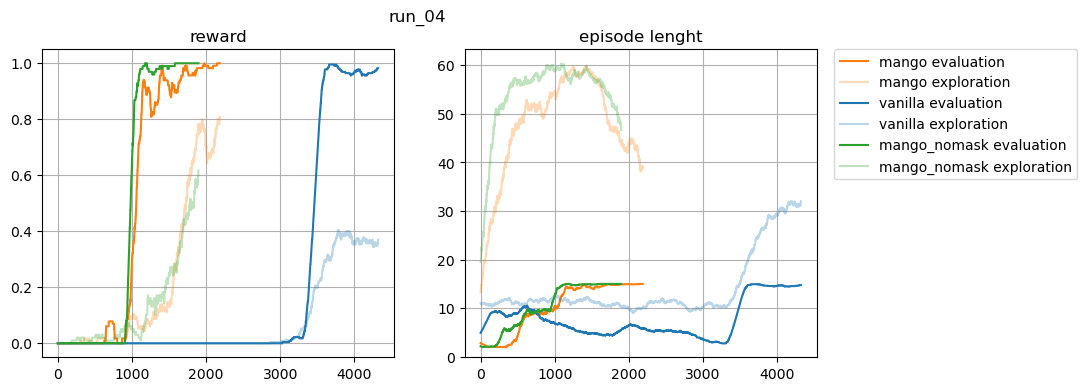

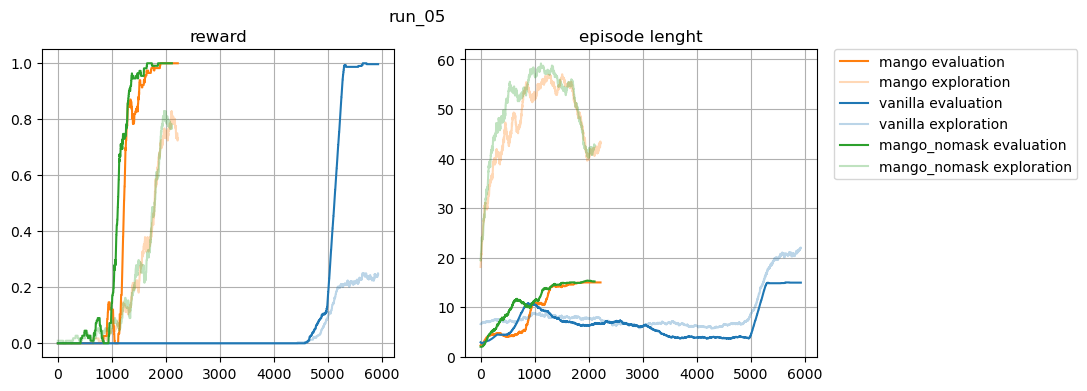

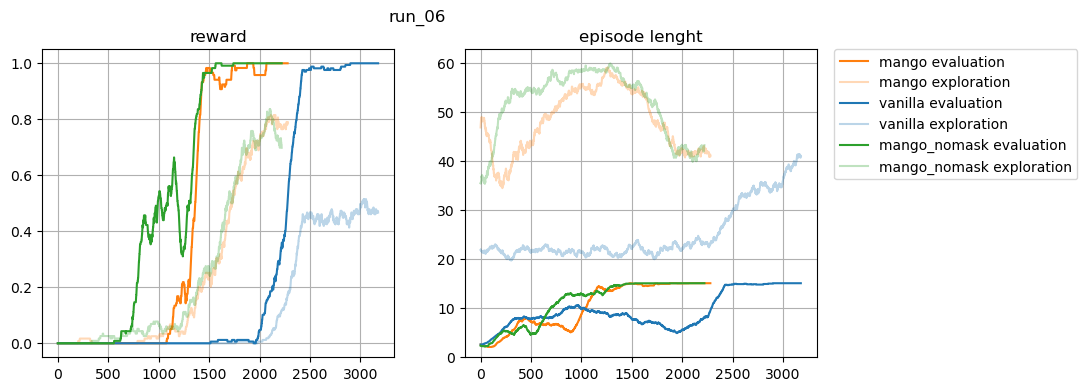

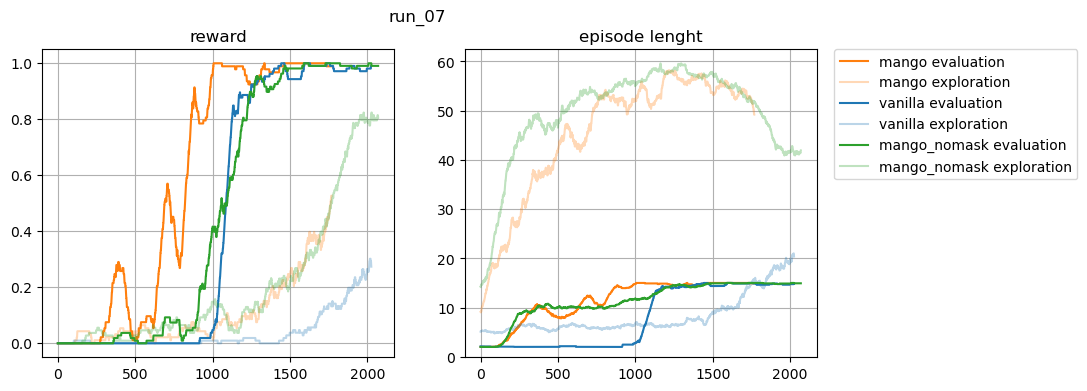

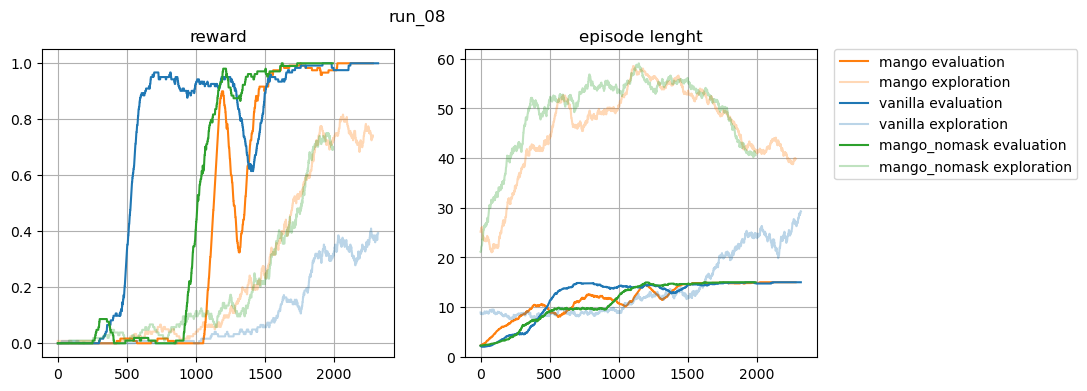

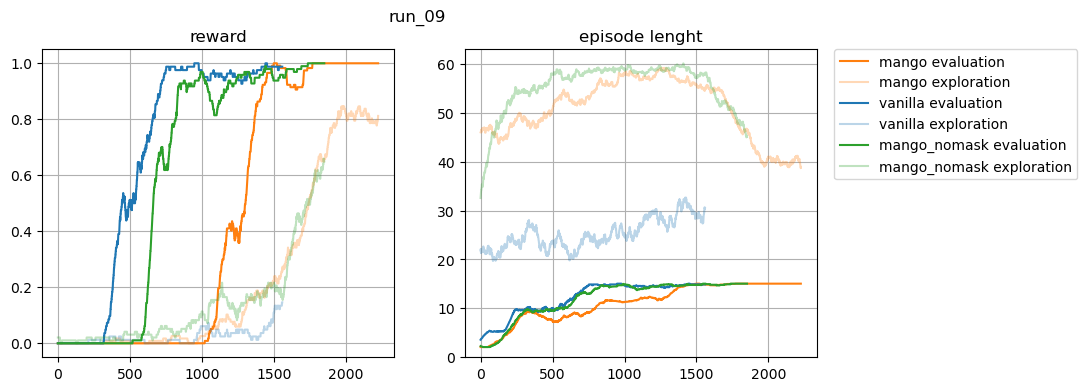

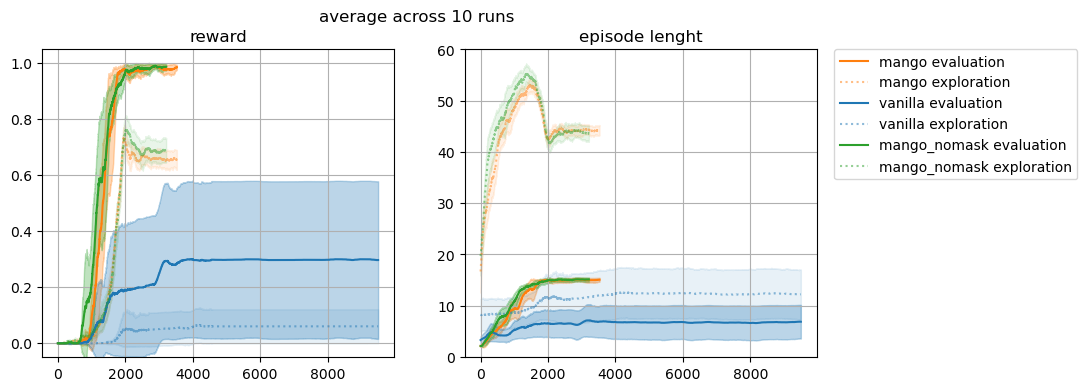

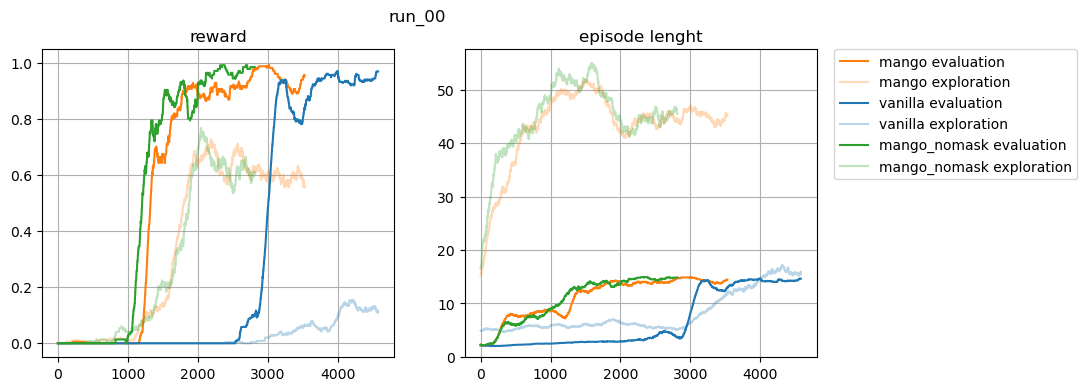

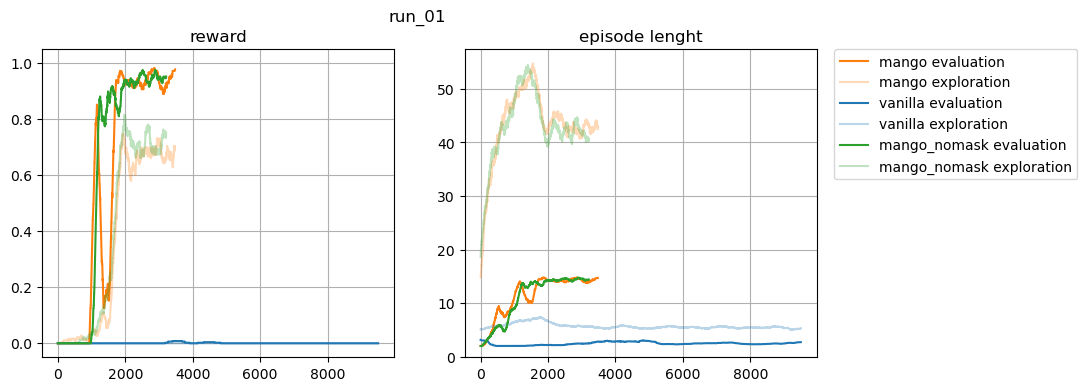

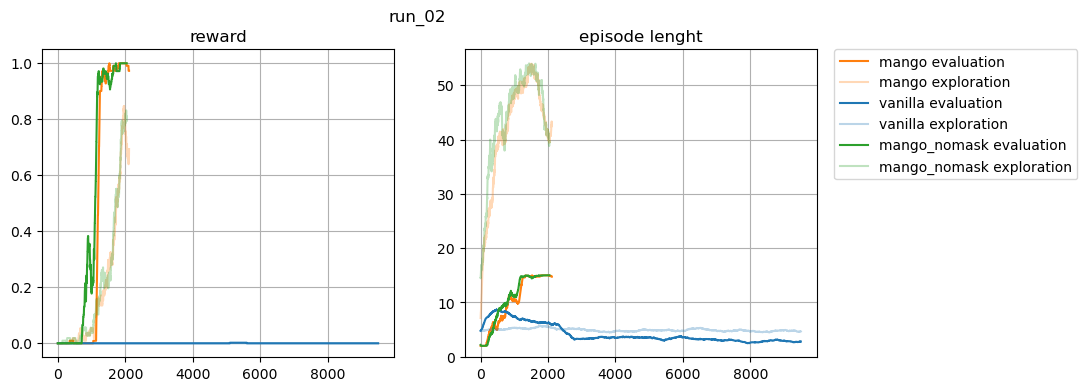

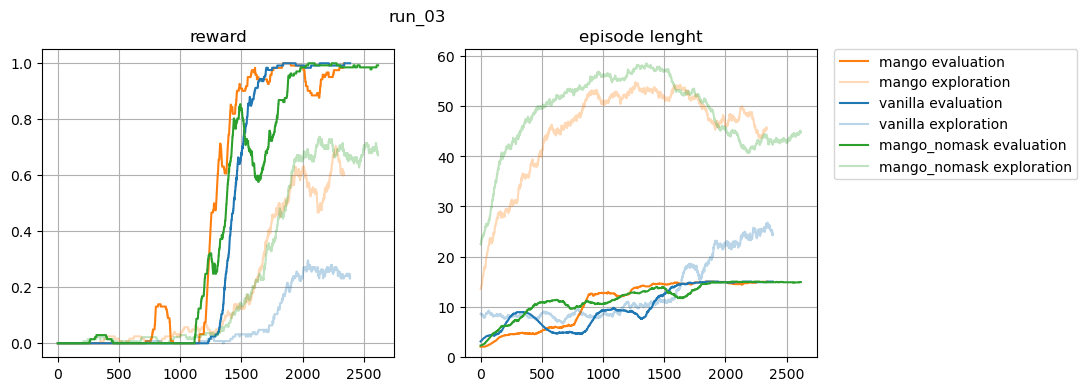

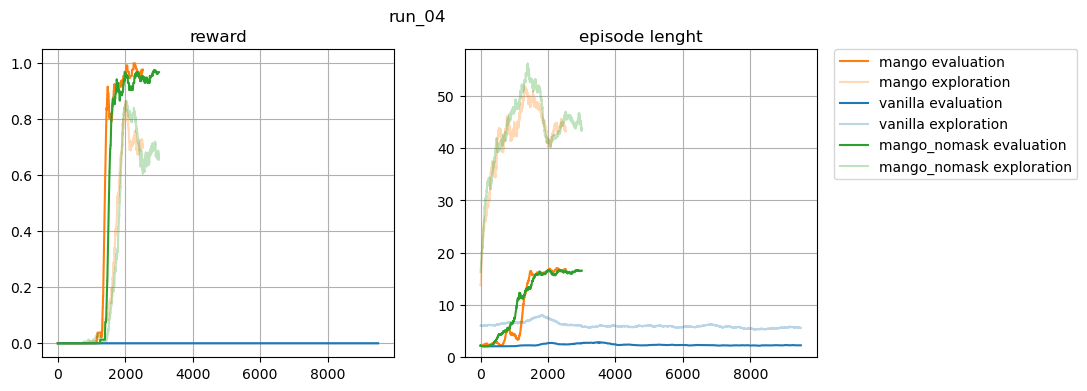

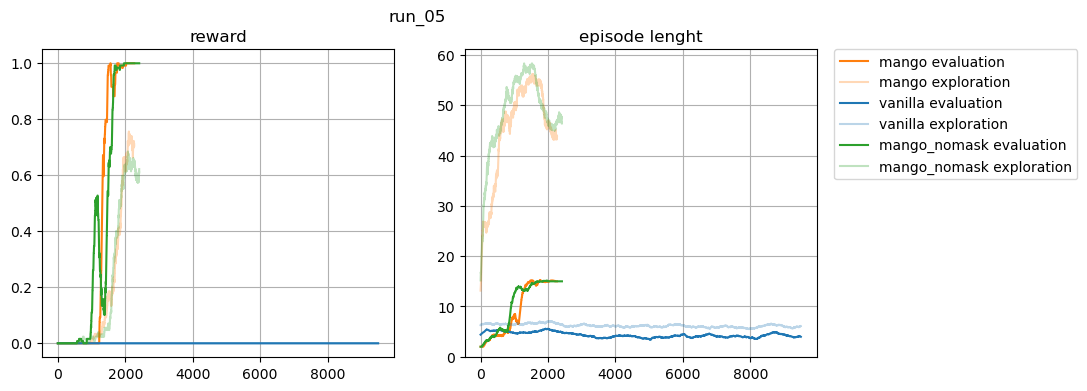

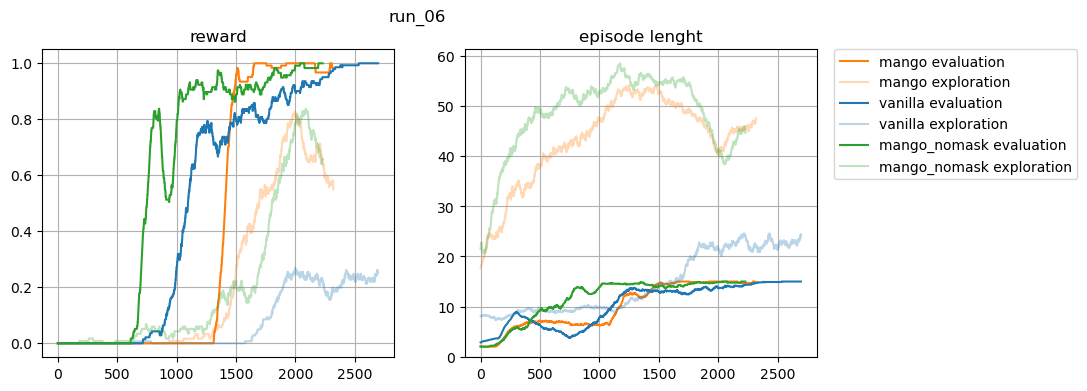

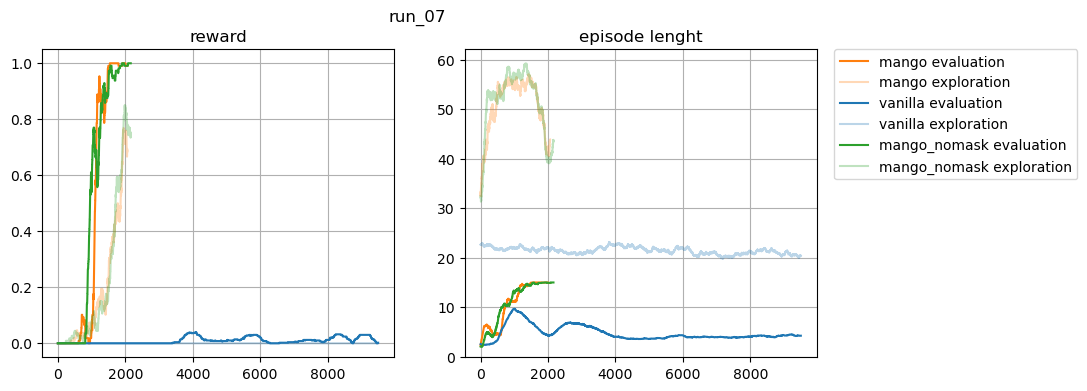

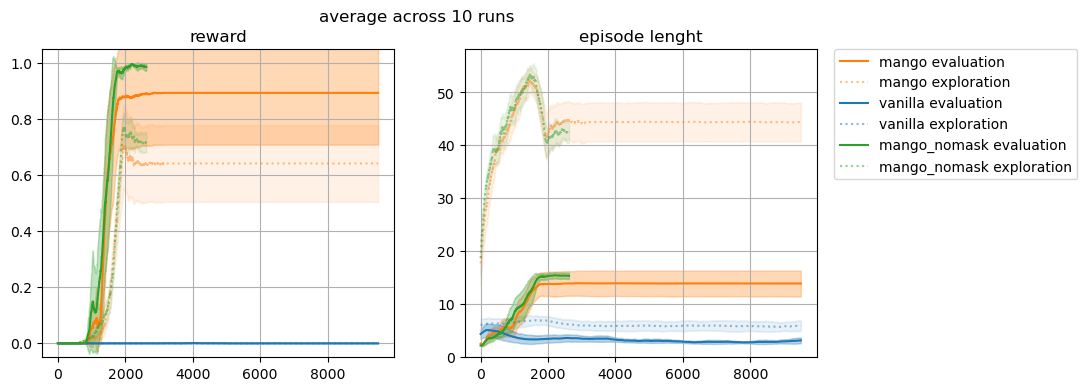

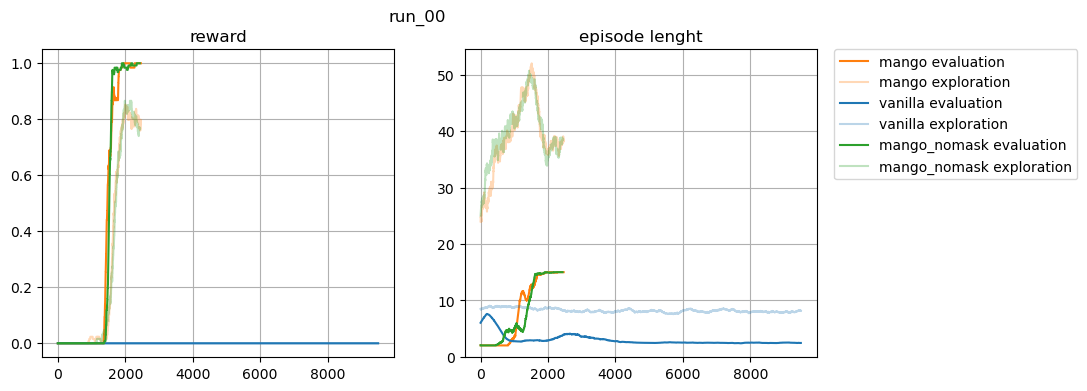

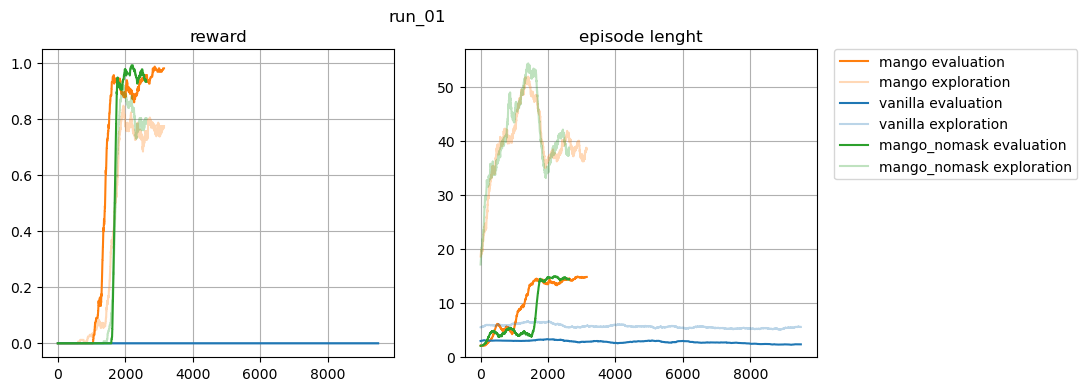

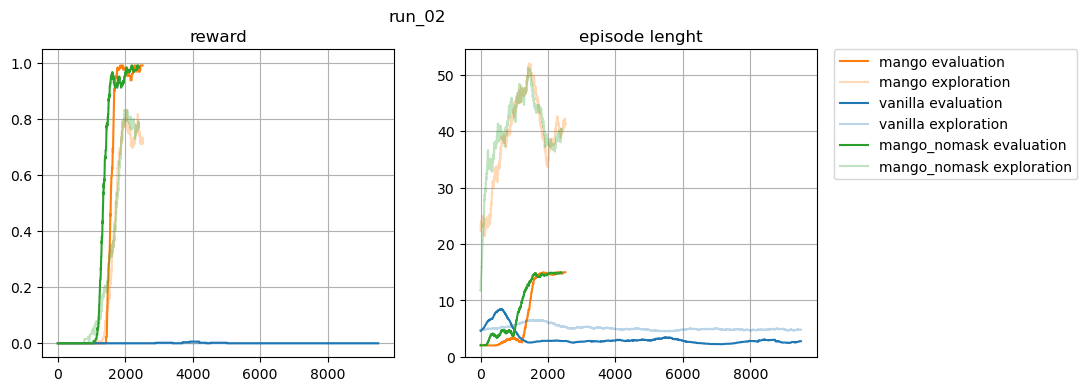

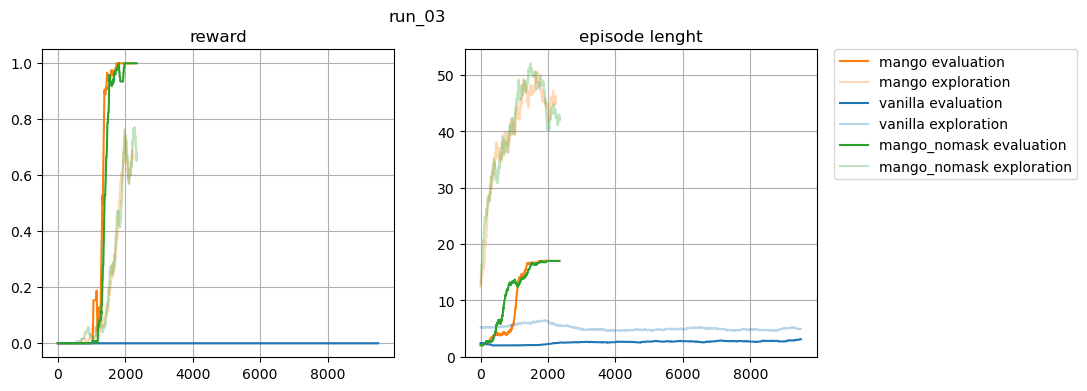

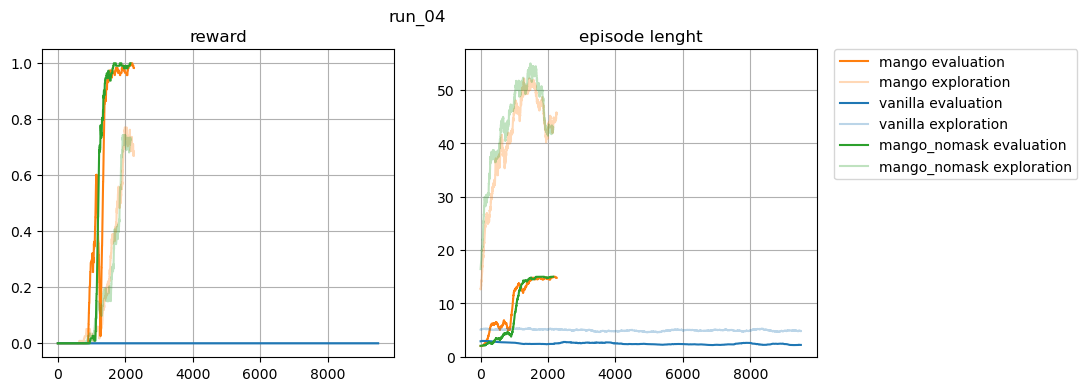

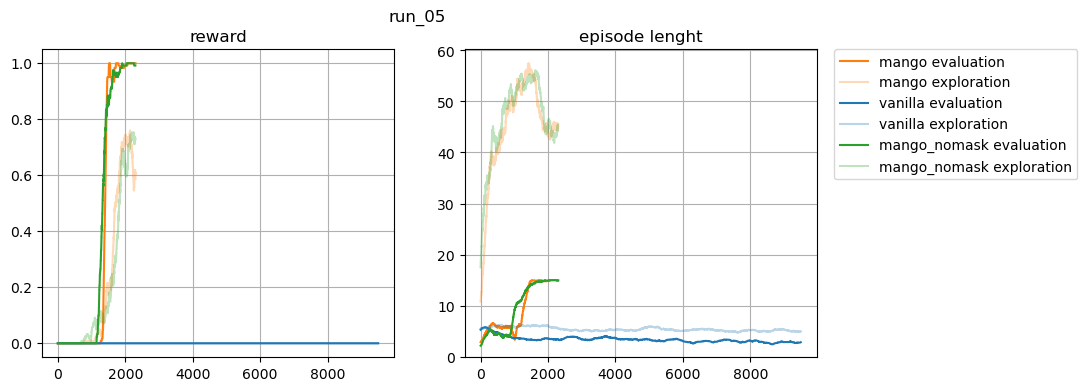

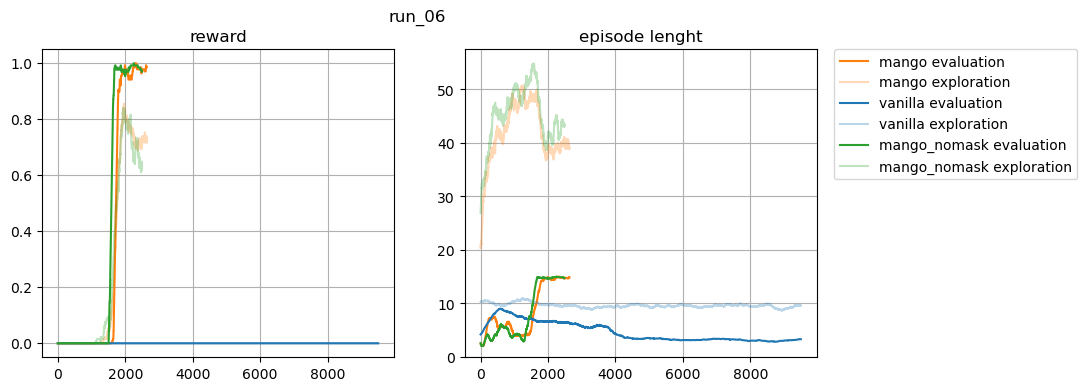

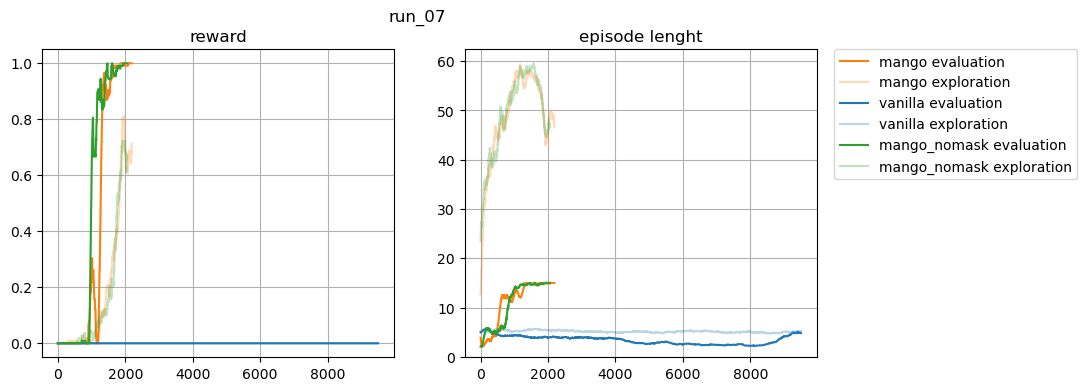

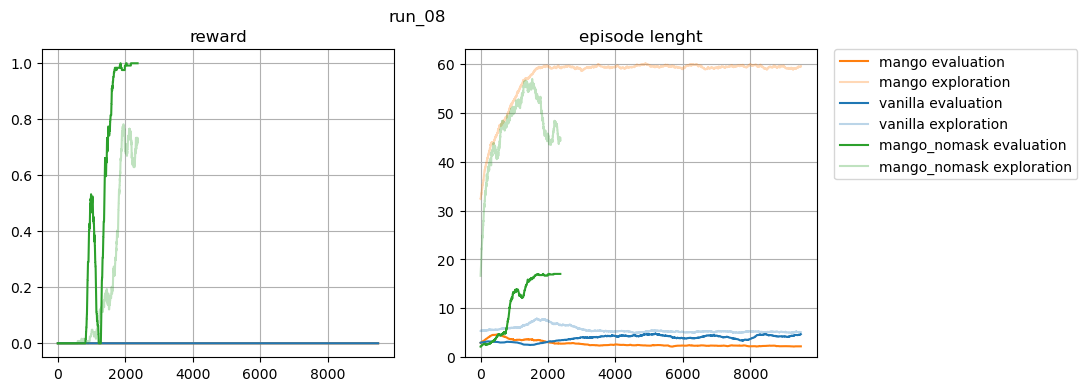

In [3]:
if isinstance(p_frozen, float):
    p_frozen = [p_frozen]
elif len(p_frozen) > 1:
    utils_plot.plot_confront_reward_avg_multiple_p(
        map_base, map_scale, p_frozen, one_shot, plot_vanilla_agent, plot_nomask_mango_agent
    )

for p in p_frozen:
    dir_path = utils_save.path_to_save_dir(map_base, map_scale, p, one_shot)
    files = sorted(os.listdir(dir_path + "models/"))
    mango_agent_files = [name for name in files if name.startswith("mango_agent")]
    run_ids = [f"run_{name[-9:-7]}" for name in mango_agent_files]
    mango_agents = [
        utils_save.load_from_file(dir_path + "models/" + file_name)
        for file_name in mango_agent_files
    ]
    agents_list, labels, colors = [mango_agents], ["mango"], ["tab:orange"]
    if plot_vanilla_agent:
        normal_agent_files = [name for name in files if name.startswith("normal_agent")]
        normal_agents = [
            utils_save.load_from_file(dir_path + "models/" + file_name)
            for file_name in normal_agent_files
        ]
        agents_list.append(normal_agents)
        labels.append("vanilla")
        colors.append("tab:blue")
    if plot_nomask_mango_agent:
        mango_nomask_agent_files = [name for name in files if name.startswith("nomask_mango_agent")]
        mango_nomask_agents = [
            utils_save.load_from_file(dir_path + "models/" + file_name)
            for file_name in mango_nomask_agent_files
        ]
        agents_list.append(mango_nomask_agents)
        labels.append("mango_nomask")
        colors.append("tab:green")

    os.makedirs(dir_path + "comparisons/", exist_ok=True)
    utils_plot.plot_confront_loss_reward_avg(
        agents_list, labels, colors, save_path=f"{dir_path}comparisons/compare_reward_avg.pdf"
    )

    for agents, run_id_str in zip(zip(*agents_list), run_ids):
        utils_plot.plot_confront_loss_reward(
            agents,
            labels,
            colors,
            save_path=f"{dir_path}comparisons/compare_reward_{run_id_str}.pdf",
        )